# **Loan Status Prediction**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('data/data.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.shape

(480, 13)

In [9]:
categorial_col = [feature for feature in df.columns if df[feature].dtype == 'object']
categorial_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
numerical_col = [feature for feature in df.columns if df[feature].dtype != 'object']
numerical_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
for col in categorial_col:
    print(df[col].value_counts())
    print('\n')

Loan_ID
LP001003    1
LP001005    1
LP002347    1
LP002345    1
LP002342    1
           ..
LP001674    1
LP001673    1
LP001666    1
LP001665    1
LP002990    1
Name: count, Length: 480, dtype: int64


Gender
Male      394
Female     86
Name: count, dtype: int64


Married
Yes    311
No     169
Name: count, dtype: int64


Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64


Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64


Self_Employed
No     414
Yes     66
Name: count, dtype: int64


Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64


Loan_Status
Y    332
N    148
Name: count, dtype: int64




In [12]:
df = df.replace(to_replace='3+', value=4)

## **Data Visualization**

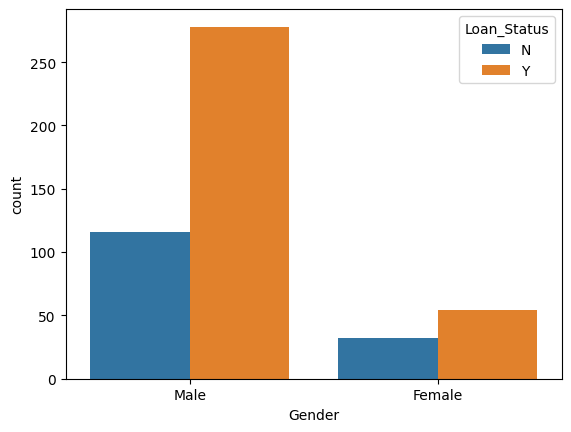

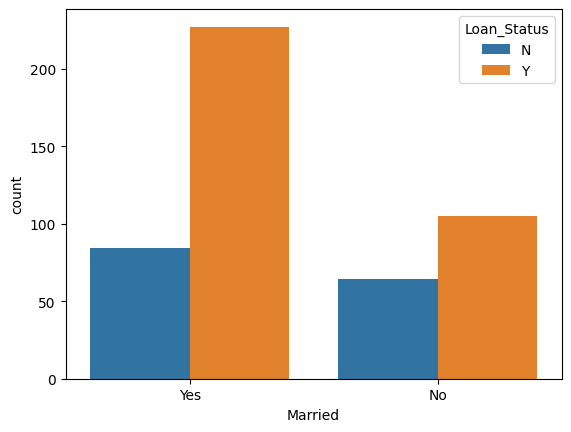

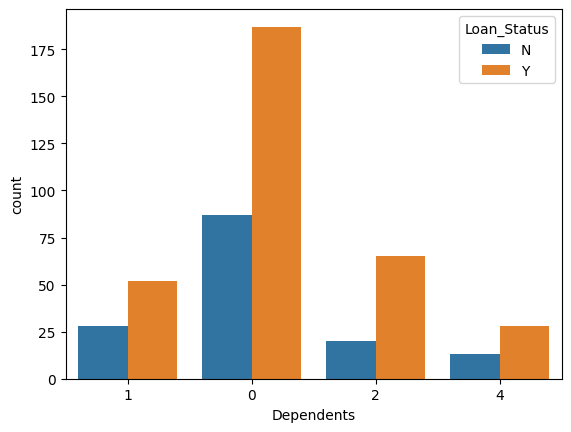

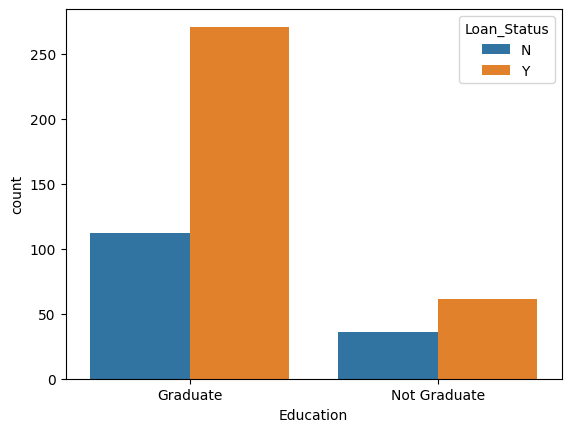

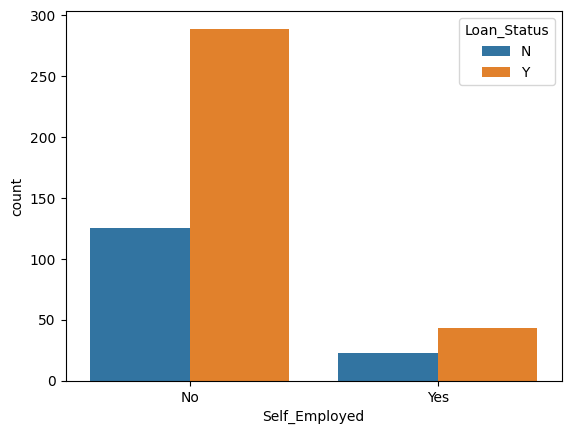

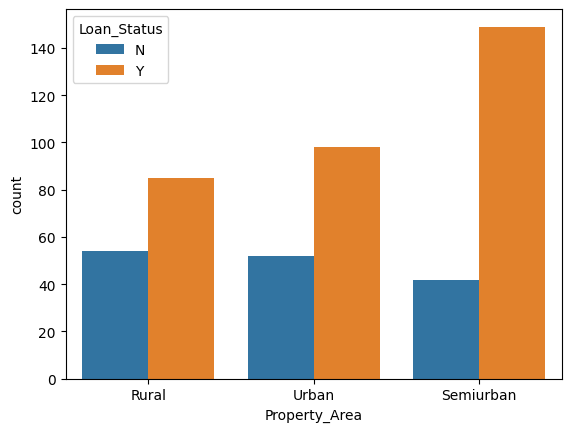

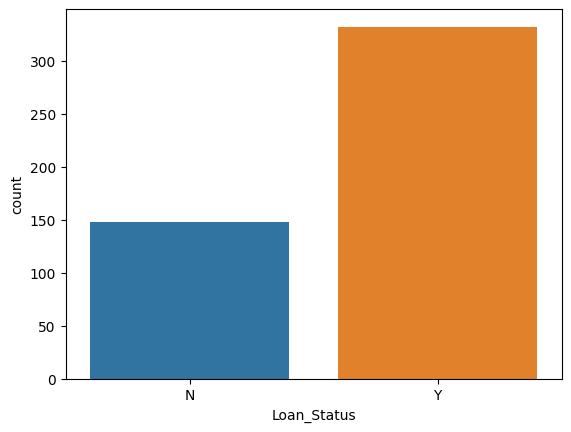

In [13]:
for col in categorial_col:
    if col != 'Loan_ID':
        sns.countplot(x=col,hue='Loan_Status',data=df)
        plt.show()

In [14]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

C:\Users\ikiga\AppData\Local\Temp\ipykernel_1832\243637112.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


## **Training with Model Implementation**

In [15]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [16]:
X_train.shape

(384, 11)

### **Logistic Regression**

In [17]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],             
    'penalty': ['l1'],  
    'solver': ['liblinear', 'saga'],           
    'max_iter': [100, 200, 500],  
    'class_weight': [None, 'balanced'],
}

lr_model = LogisticRegression()
grid_search_lr = GridSearchCV(lr_model, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_lr.fit(X_train, y_train) 


prediction_data_lr = grid_search_lr.predict(X_test)

print("Best parameters found: ", grid_search_lr.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search_lr.best_score_))
print("Test accuracy: {:.3f}".format(accuracy_score(y_test, prediction_data_lr)))

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameters found:  {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.797
Test accuracy: 0.823


### **Random Forest**

In [18]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],          
    'max_depth': [None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True],
    'class_weight': ['balanced']
}

model_rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

prediction_data_rf = grid_search_rf.predict(X_test)


print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search_rf.best_score_))
print("Test accuracy: {:.3f}".format(accuracy_score(y_test, prediction_data_rf)))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy: 0.805
Test accuracy: 0.812


### **Gradient Boosting**

In [19]:
param_grid = {
    'n_estimators': [50, 100, 200],    
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7]     
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
predictions_gb = grid_search_gb.predict(X_test)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search_rf.best_score_))
print("Test accuracy: {:.3f}".format(accuracy_score(y_test, prediction_data_rf)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy: 0.805
Test accuracy: 0.812


### **SVC**

In [20]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
predictions_svc_test = svc.predict(X_test)

print("Test accuracy (Test): {:.3f}".format(accuracy_score(y_test, predictions_svc_test)))

Test accuracy (Test): 0.812
